# A formulation of membrane finite elements with true drilling rotation

Implementation of the article:
    
Boutagouga, Djamel (2020). *A formulation of membrane finite elements with true drilling rotation: the compatible triangular element*. Engineering Computations, Vol. 37, No. 1, p. 203-236. http://dx.doi.org/10.1108/EC-12-2018-0572

In [1]:
import sympy as sp
from sympy import symbols, diff, solve, linear_eq_to_matrix, Matrix, oo

sp.init_printing()

# para imprimir el valor de las variables:
from IPython.display import Math   
def imprimir (texto, valor):
    return Math(texto + rf'{sp.latex(valor)}')

# para que varios imprimir se puedan ejecutar en la misma celda:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Define symbolic variables:

In [2]:
a1, a2, a3, a4, a5, a6 = symbols('a1:7')
b1, b2, b3, b4, b5, b6 = symbols('b1:7')
d1, d2, d3, d4, d5, d6 = symbols('d1:7')

c12, c23, c31 = symbols('c12, c23, c31')
s12, s23, s31 = symbols('s12, s23, s31')
L12, L23, L31 = symbols('l_12, l_23, l_31')

alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7, alpha_8, alpha_9 = symbols('alpha_1:10')
alphas = [ alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7, alpha_8, alpha_9 ]

x, y = symbols('x, y')

P4, P5, P6 = symbols('P4:7')
x1, x2, x3 = symbols('x1:4', real=True)
y1, y2, y3 = symbols('y1:4', real=True)

x1 = y1 = y2 = 0
x4 = (x1+x2)/2;    x5 = (x2+x3)/2;    x6 = (x3+x1)/2
y4 = (y1+y2)/2;    y5 = (y2+y3)/2;    y6 = (y3+y1)/2

Calculate equations (15):

In [3]:
# equations 14
eqs = [ a1 + a2*x1 + a3*y1 + a4*x1**2 + a5*x1*y1 + a6*y1**2 - 0,
        a1 + a2*x2 + a3*y2 + a4*x2**2 + a5*x2*y2 + a6*y2**2 - 0,
        a1 + a2*x3 + a3*y3 + a4*x3**2 + a5*x3*y3 + a6*y3**2 - 0,
        a1 + a2*x4 + a3*y4 + a4*x4**2 + a5*x4*y4 + a6*y4**2 - 1,
        a1 + a2*x5 + a3*y5 + a4*x5**2 + a5*x5*y5 + a6*y5**2 - 0,
        a1 + a2*x6 + a3*y6 + a4*x6**2 + a5*x6*y6 + a6*y6**2 - 0 ]
sol_a = solve(eqs, [a1, a2, a3, a4, a5, a6])

# print equations 15
imprimir('a_1 = ', sol_a[a1])
imprimir('a_2 = ', sol_a[a2])
imprimir('a_3 = ', sol_a[a3])
imprimir('a_4 = ', sol_a[a4])
imprimir('a_5 = ', sol_a[a5])
imprimir('a_6 = ', sol_a[a6])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculate equations (17):

In [4]:
# ecuaciones 16
eqs = [ b1 + b2*x1 + b3*y1 + b4*x1**2 + b5*x1*y1 + b6*y1**2 - 0,
        b1 + b2*x2 + b3*y2 + b4*x2**2 + b5*x2*y2 + b6*y2**2 - 0,
        b1 + b2*x3 + b3*y3 + b4*x3**2 + b5*x3*y3 + b6*y3**2 - 0,
        b1 + b2*x4 + b3*y4 + b4*x4**2 + b5*x4*y4 + b6*y4**2 - 0,
        b1 + b2*x5 + b3*y5 + b4*x5**2 + b5*x5*y5 + b6*y5**2 - 1,
        b1 + b2*x6 + b3*y6 + b4*x6**2 + b5*x6*y6 + b6*y6**2 - 0 ]
sol_b = solve(eqs, [b1, b2, b3, b4, b5, b6])

# print equations 17
imprimir('b_1 = ', sol_b[b1])
imprimir('b_2 = ', sol_b[b2])
imprimir('b_3 = ', sol_b[b3])
imprimir('b_4 = ', sol_b[b4])
imprimir('b_5 = ', sol_b[b5])
imprimir('b_6 = ', sol_b[b6])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculate equations (19):

In [5]:
# ecuaciones 18
eqs = [ d1 + d2*x1 + d3*y1 + d4*x1**2 + d5*x1*y1 + d6*y1**2 - 0,
        d1 + d2*x2 + d3*y2 + d4*x2**2 + d5*x2*y2 + d6*y2**2 - 0,
        d1 + d2*x3 + d3*y3 + d4*x3**2 + d5*x3*y3 + d6*y3**2 - 0,
        d1 + d2*x4 + d3*y4 + d4*x4**2 + d5*x4*y4 + d6*y4**2 - 0,
        d1 + d2*x5 + d3*y5 + d4*x5**2 + d5*x5*y5 + d6*y5**2 - 0,
        d1 + d2*x6 + d3*y6 + d4*x6**2 + d5*x6*y6 + d6*y6**2 - 1 ]
sol_d = solve(eqs, [d1, d2, d3, d4, d5, d6])

# print equations 19
imprimir('d_1 = ', sol_d[d1])
imprimir('d_2 = ', sol_d[d2])
imprimir('d_3 = ', sol_d[d3])
imprimir('d_4 = ', sol_d[d4])
imprimir('d_5 = ', sol_d[d5])
imprimir('d_6 = ', sol_d[d6])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculate equation (21):

In [6]:
# equations 13
dp4 = (a1 + a2*x + a3*y + a4*x**2 + a5*x*y + a6*y**2)*P4
dp5 = (b1 + b2*x + b3*y + b4*x**2 + b5*x*y + b6*y**2)*P5
dp6 = (d1 + d2*x + d3*y + d4*x**2 + d5*x*y + d6*y**2)*P6

# equations 20
up4 = dp4*c12;    up5 = dp5*c23;    up6 = dp6*c31
vp4 = dp4*s12;    vp5 = dp5*s23;    vp6 = dp6*s31

# equations 10
ul = alpha_1 + alpha_2*x + alpha_3*y
vl = alpha_4 + alpha_5*x + alpha_6*y

# equations 12
up = dp4*c12 + dp5*c23 + dp6*c31
vp = dp4*s12 + dp5*s23 + dp6*s31

# equations 9
u = ul + up
v = vl + vp

# print equations 21
imprimir('u = ', u)
imprimir('v = ', v)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculate equation (23):

In [7]:
# equation 7
phi = (diff(v, x) - diff(u, y))/2

# print equation 23
imprimir(r'\varphi = ', phi)

<IPython.core.display.Math object>

In [8]:
# merging dictionaries
sols = sol_a | sol_b | sol_d

# select those constants a_i, b_i, d_i equal to 0
sols_0    = {k:v for k, v in sols.items() if v == 0}

# P4 = alpha_7,   P5 = alpha_8,   P6 = alpha_9
P456 = {P4: alpha_7, P5:alpha_8, P6:alpha_9}

In [9]:
# create a dictionary with all constants to be replaced
consts = sols_0 | P456

# equation 24
u   = u.subs(consts)
v   = v.subs(consts)
phi = phi.subs(consts)

Calculate the strain matrix $\boldsymbol{B}$:

In [10]:
# equation 26
ex  = diff(u, x)
ey  = diff(v, y)
gxy = diff(u, y) + diff(v, x)

# equation 27
B, _ =  linear_eq_to_matrix([ex, ey, gxy], alphas)
imprimir(r'\boldsymbol{B} = ', B)

<IPython.core.display.Math object>

In [11]:
# equation 25
A_uvphi, _ = linear_eq_to_matrix([u, v, phi], alphas)

# equations 29 and 30
A1 = A_uvphi.subs({x:x1, y:y1})
A2 = A_uvphi.subs({x:x2, y:y2})
A3 = A_uvphi.subs({x:x3, y:y3})

A = sp.BlockMatrix([[A1], [A2], [A3]]).as_explicit()
imprimir(r'\boldsymbol{A} = ', A)

<IPython.core.display.Math object>

Estimate $c_{ij}$ and $s_{ij}$, the outward normals components of the edge located between nodes $i$ and $j$:

In [12]:
c12 =  (y2 - y1)/L12;    c23 =  (y3 - y2)/L23;    c31 =  (y1 - y3)/L31
s12 = -(x2 - x1)/L12;    s23 = -(x3 - x2)/L23;    s31 = -(x1 - x3)/L31

Replace $c_{ij}$ and $s_{ij}$ into $\boldsymbol{A}$, in order to calculate equation (31):

In [13]:
# equation 31
cij_sij = { 'c12':c12, 's12':s12, 'c23':c23, 's23':s23, 'c31':c31, 's31':s31 }
A = A.subs(sols | cij_sij).expand()
imprimir(r'\boldsymbol{A} = ', A)

<IPython.core.display.Math object>

Note that $\boldsymbol{A}$ is a singular matrix with rank 8:

In [14]:
A.det()

In [15]:
A.rank()

Print equations (32):

In [16]:
phi1 = A[2,:].dot(alphas)
phi2 = A[5,:].dot(alphas)
phi3 = A[8,:].dot(alphas)

imprimir(r'\varphi_1 = ', phi1)
imprimir(r'\varphi_2 = ', phi2)
imprimir(r'\varphi_3 = ', phi3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Estimate the rotation due to linear displacement:

In [17]:
phi_R = (phi1 + phi2 + phi3)/3
imprimir(r'\varphi_l = \varphi_R = ', phi_R)

<IPython.core.display.Math object>

Print equations (33):

In [18]:
imprimir(r'\varphi_2 - \varphi_1 = ', phi2 - phi1)
imprimir(r'\varphi_3 - \varphi_2 = ', phi3 - phi2)
imprimir(r'\varphi_1 - \varphi_3 = ', phi1 - phi3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Estimate the central rotation:

In [19]:
phi0 = phi.subs({x:(x1 + x2 + x3)/3, y:(y1 + y2 + y3)/3} | sols | cij_sij).expand()
imprimir(r'\varphi_0 = ', phi0)

<IPython.core.display.Math object>

In [20]:
k, D, E, F = symbols('k, D, E, F')

A_amend = Matrix([[0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0, k*D, k*E, k*F],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0, k*D, k*E, k*F],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0, k*D, k*E, k*F]])

In [21]:
# equation 37
A1 = A + A_amend

In [22]:
Ainv = A1.inv()

In [23]:
# equation 38
H = Ainv.limit(k, oo)
imprimir(r'\boldsymbol{H} = ', H)

<IPython.core.display.Math object>

In [24]:
# equations 39
phi1, phi2, phi3 = symbols('varphi1:4')

tmp = 6*(D*L12 + E*L23 + F*L31)
eqs = [ ((alpha_7 - (H[7-1,3-1]*phi1 + H[7-1,6-1]*phi2 + H[7-1,9-1]*phi3))*tmp).factor(),
        ((alpha_8 - (H[8-1,3-1]*phi1 + H[8-1,6-1]*phi2 + H[8-1,9-1]*phi3))*tmp).factor(),
        ((alpha_9 - (H[9-1,3-1]*phi1 + H[9-1,6-1]*phi2 + H[9-1,9-1]*phi3))*tmp).factor() ]

# equations 40
sol = solve(eqs, [D,F])

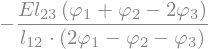

In [25]:
sol[D].factor()

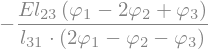

In [26]:
sol[F].factor()

In [27]:
# equations 42
eqs = [ (H[7-1,9-1] - 0)*tmp.expand(),
        (H[8-1,3-1] - 0)*tmp.expand(),
        (H[9-1,6-1] - 0)*tmp.expand() ]
eqs

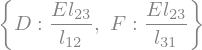

In [28]:
# equations 43
sol2 = solve(eqs, [D, F])
sol2

In [29]:
#((sol2[D]*alpha_7 + E*alpha_8 + sol2[F]*alpha_9)/(E*L23)).expand()

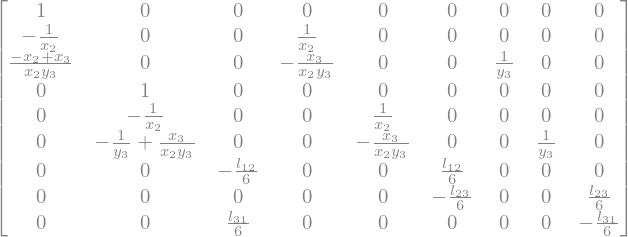

In [30]:
# equation 44
D = 1/L12
E = 1/L23
F = 1/L31

A_amend = Matrix([[0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0, k*D, k*E, k*F],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0, k*D, k*E, k*F],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0,   0,   0,   0],
                  [0, 0, 0, 0, 0, 0, k*D, k*E, k*F]])

# equation 46
A2 = A + A_amend

# equation 47
Ainv = A2.inv() #.subs({L12:x2}).simplify()

# equation 48
H = Ainv.limit(k, oo)
H

In [31]:
# Calculation of the equations of Appendix 2
u1, u2, u3       = symbols('u_1:4')
v1, v2, v3       = symbols('v_1:4')
phi1, phi2, phi3 = symbols('varphi1:4')

U       = Matrix([u1, v1, phi1, u2, v2, phi2, u3, v3, phi3 ])

u_v_phi = (A_uvphi @ H @ U).subs(sols).subs(cij_sij).expand()

imprimir(       'u = ', sp.collect(u_v_phi[0], U))
imprimir(       'v = ', sp.collect(u_v_phi[1], U))
imprimir(r'\varphi = ', sp.collect(u_v_phi[2], U))        

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>